# Introduction to Unconstrained Continuous Optimization

```{admonition} Learning outcomes
After reading this note, you will be able to:
- Define an optimization problem
- Describe the gradient descent procedure
- Define local and global optimality conditions for unconstrained problems
- Model and solve linear optimization problems
- Model and solve non-linear optimization problems
```

## Notation

We will work on a wide variety of optimization problems. We will begin by establishing some common notation that we can use throughout the course. We will typically use small-case and upper-case boldface for vectors and matrices, respectively. A simple, constrained optimization problems could read as follows: 
```{math}
\begin{align}
\min_{\boldsymbol{x}\in\mathcal{X}}\; & f(\boldsymbol{x})\\
\text{subject to } & g_1(\boldsymbol{x}) \leq \boldsymbol{b}_1\\
& g_2(\boldsymbol{x}) = \boldsymbol{b}_2\\
\end{align}
````
Here, $\boldsymbol{x}$ is an $n$-dimensional vector of *decision variables*; these are the values that we can control to achieve an optimal outcome. Notice that under the $\min$ sign, we have declared that this vector must belong to some domain $\mathcal{X}$. The function $f(\cdot)$ maps a vector of values that we assign to decision variables to a real value; it is the *objective function* which we are attempting to minimize here. The functions $g_1(\cdot)$ and $g_2(\cdot)$ are generally *vector-valued*, i.e., they map the input (a vector of decision variable values) to another vector, here of the same dimension $n$. The $\leq$ and $=$ signs here should be interpreted as comparing two vectors: the output of $g_1(\cdot)$ or $g_2(\cdot)$ to vectors $\boldsymbol{b}_1$ or $\boldsymbol{b}_2$, respectively. These last two vectors will be typically referred to as *right-hand side* parameters or vectors.

This is a good time to distinguish decision variables from problem parameters (also sometimes referred to as "data"). As a user of optimization, you are interested in solving some applied or theoretical problem. To *model* the problem, you set certain parameters: your objective function $f(\cdot)$, your constraint functions $g_1(\cdot)$ and $g_2(\cdot)$, and your right-hand side vectors $\boldsymbol{b}_1$ and $\boldsymbol{b}_2$. As for the decision variables, these are to be determined through optimization, which comes down to a certain algorithmic procedure for searching the domain $\mathcal{X}$ of the variables $\boldsymbol{x}$ for values that satisfy the two sets of inequality and equality constraints while also minimizing the objective function.

```{note}
You can *maximize* rather than minimize the objective function $f(\cdot)$ by minimizing the function $-f(\cdot)$. As such, we will alternate between the two in these notes without loss of generality. Similarly, $\geq$ constraints can be expressed using $\leq$ constraints by multiplying both sides of the inequality with $-1$.
```

## Some one and two-dimensional functions

We will frequently make use of two-dimensional (or sometimes three-dimensional) plots to make sense of an optimization problem. Let us look at a continuous function $f:\mathbb{R}\mapsto\mathbb{R}$. This notation simply says that the function $f(\cdot)$ maps from one real number to another. We will use it extensively.

First off is this wiggly function in blue. Let's minimize it assuming only bound constraints on $x$, i.e., with domain $\mathcal{X}=[-4,4]$. There is a unique *global minimum* at around $x=-2.25$. However, there are multiple other *critical points*, points where the function $f$ in blue has derivatives (in orange) equal to zero. Some of these points are also *local minima*; others are *local maxima*.

Since this optimization problem has only simple bound counstraints and involves a continuous function, one can compute all of its local minima and maxima by finding the roots of the function's derivative. This is exactly what we've done in the code; see the next Note for more details on how to elegantly do this.

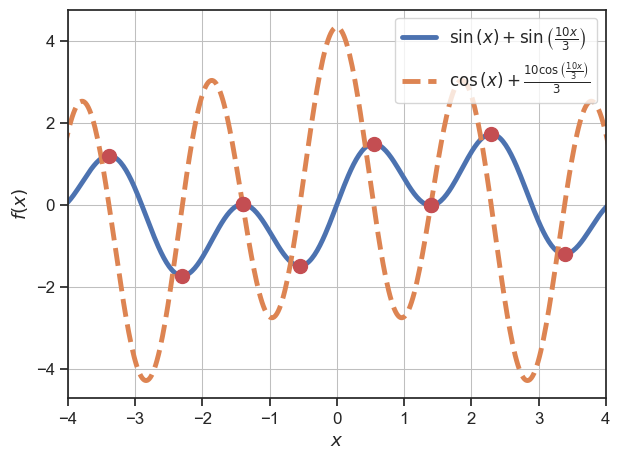

In [88]:
from sympy import * #Symbol, symbols, sin, cos, Polygon, solve, lambdify, Rational, pi, N
from sympy.plotting import plot
from spb import *
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# sns.plotting_context("notebook")
sns.set_theme()
sns.set_context("notebook", font_scale=1.1, rc={"lines.linewidth": 3.5})
sns.set_style("white")
sns.set_style("ticks")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()

x = Symbol('x')
funky_function = sin(x) + sin(Rational(10.0, 3.0) * x)
funky_function_lambda = lambdify(x, funky_function)

funky_function_derivative_lambda = lambdify(x, funky_function.diff(x))
sols = fsolve(funky_function_derivative_lambda, np.linspace(-4,4,15))

plt.scatter(sols, [funky_function_lambda(sol) for sol in sols], marker='o', color='r', s=100, zorder=100)

p1 = plot(funky_function, show=False, legend=True, xlim=(-4,4), fig=fig, ax=ax)
p2 = plot(funky_function.diff(x), {'linestyle':'--'}, show=False, xlim=(-4,4), fig=fig, ax=ax)
p1.append(p2[0])
p1.show()

```{admonition} Programming note
Look through the cell above to see how the figure was generated. I used Python's SymPy package, a great tool for symbolic computation. Think of it as being similar to MATLAB, in that it understand mathematical functions symbolically rather than numerically. This means that it can automatically derive the derivative of a function just as we would on paper! In additional, I used SciPy's `fsolve()` to find the zeros or roots of the derivative $f'(\cdot)$. This function took 15 initial guesses of where the roots of the orange derivative function are, then it searched around them. We will not go into this process in detail, but it is also a kind of optimization.
```

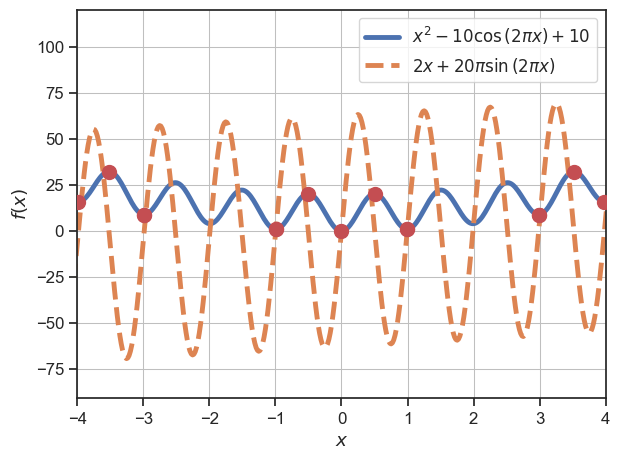

In [2]:
fig, ax = plt.subplots()

x = Symbol('x')
funky_function2 = 10 + x**2 - 10*cos(2*pi*x)
funky_function2_lambda = lambdify(x, funky_function2)

funky_function2_derivative_lambda = lambdify(x, funky_function2.diff(x))
sols = fsolve(funky_function2_derivative_lambda, np.linspace(-4,4,15))

plt.scatter(sols, [funky_function2_lambda(sol) for sol in sols], marker='o', color='r', s=100, zorder=100)

p1 = plot(funky_function2, show=False, legend=True, xlim=(-4,4), fig=fig, ax=ax)
p2 = plot(funky_function2.diff(x), {'linestyle':'--'}, show=False, xlim=(-4,4), fig=fig, ax=ax)
p1.append(p2[0])
p1.show()

Let's move on to some two-dimensional functions. This one is a famous "test function" referred to as [*Branin*](https://www.sfu.ca/~ssurjano/branin.html). The color correspond to the z-axis values, more blue for smaller values, more yellow for larger values.

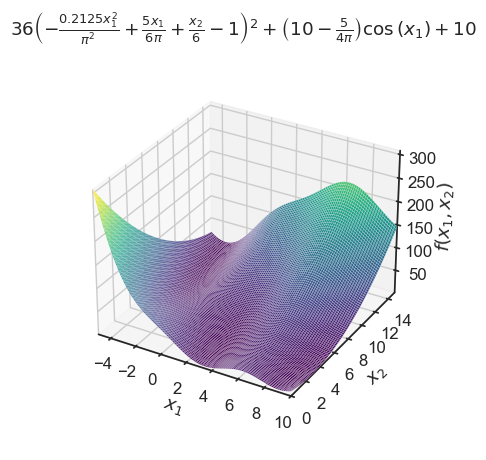

In [85]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=None, zoom=0.85)

# This is the famous Branin function: https://www.sfu.ca/~ssurjano/branin.html
a=1; b=5.1/(4*pi**2); c=5/pi; r=6; s=10; t=1/(8*pi)
x1, x2 = symbols('x1 x2')
branin_function = a*(x2-b*x1**2+c*x1-r)**2+s*(1-t)*cos(x1)+s

# sol = [float(-pi),12.275] # The two other minima are [9.42478, 2.475] and [pi,2.275]
# plt.scatter([sol[0]], [sol[1]], [funky_function_lambda(sol[0], sol[1])], marker='o', color='r')

p1 = plot3d(branin_function, (x1, -5, 10), (x2, 0, 15), title="$%s$" % latex(branin_function), fig=fig, ax=ax)
p1.show()

Another interesting test function with a unique global minimum at $(-2.903534, -2.903534)$.

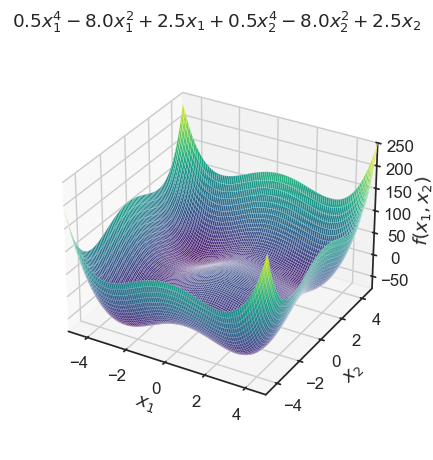

In [84]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=None, zoom=.85)

# This is this function: https://www.sfu.ca/~ssurjano/stybtang.html
x1, x2 = symbols('x1 x2')
stybtang_function = 0.5*(x1**4 - 16*(x1**2) + 5*x1 + x2**4 - 16*(x2**2) + 5*x2)
stybtang_function_lambda = lambdify([x1, x2], stybtang_function)

# The global minimum; unable to plot it for some reason
# sol = [-2.903534, -2.903534] 
# plt.scatter([sol[0]], [sol[1]], [funky_function_lambda(sol[0], sol[1])], marker='o', color='r')

p1 = plot3d(stybtang_function, (x1, -5, 5), (x2, -5, 5), title="$%s$" % latex(stybtang_function), fig=fig, ax=ax)
p1.show()

### Saddle points

Lastly, a very simple function in which a critical point with gradient (i.e., derivative in two dimensions or more) zero that is **not** a local minimum or maximum! Can you identify where the point is?

We call *saddle point* any point which has zero derivatives in all variables but is not a local extremum (minimum or maximum). You should already be able to imagine that the existence of saddle points can make optimization difficult!

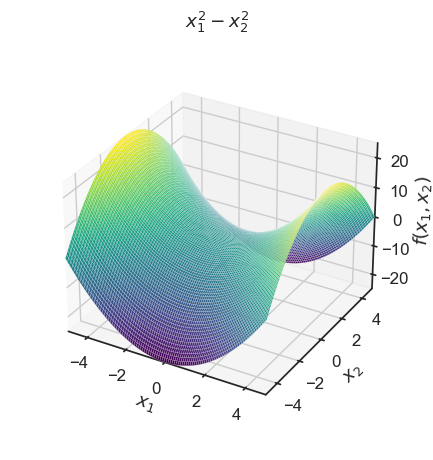

In [83]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_box_aspect(aspect=None, zoom=.85)

x1, x2 = symbols('x1 x2')
saddle_function = x1**2 - x2**2
saddle_function_lambda = lambdify([x1, x2], saddle_function)

plt.scatter(0,0,0, c='r', marker='o')
p1 = plot3d(saddle_function, (x1, -5, 5), (x2, -5, 5), title="$%s$" % latex(saddle_function), fig=fig, ax=ax)
p1.show()

### Contour plots

What if we wanted to visualize this last function in *two dimensions* rather than three? Contour plots enable that as you can see in the next figure. The annotated curves show the function value achieved by points on that curve. Notice that our saddle point $(0,0)$ is in the middle and it achieves a value of zero. Move up or down from it, and the value is smaller, i.e., the saddle point is *not* a local minimizer!

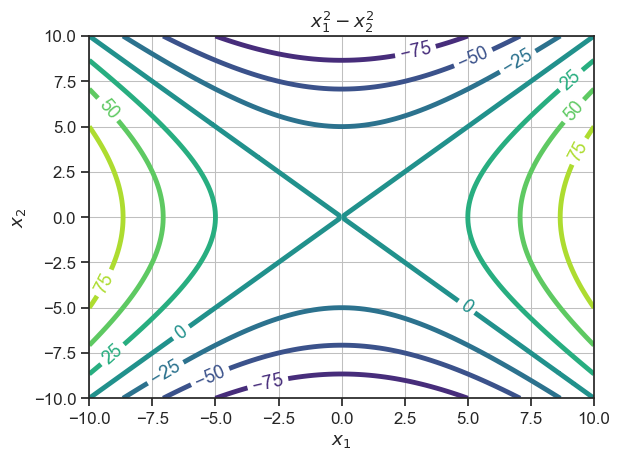

In [6]:
from sympy.plotting import plot3d

fig = plt.figure()
ax = fig.add_subplot()#projection='3d')
p1 = plot_contour(saddle_function, (x1, -10, 10), (x2, -10, 10), title="$%s$" % latex(saddle_function), is_filled=False, fig=fig, ax=ax)
p1.show()

## Definitions of local and global minimizers

```{prf:definition} Local minimizer
:label: local-min
A *local minimizer* is a point that minimizes a function $f$ within a neighborhood. In other words, $\hat{\boldsymbol{x}}$ is a local minimizer if there exists a $\delta > 0$ such that $f(\hat{\boldsymbol{x}}) \leq  f(x)$ whenever $\hat{\boldsymbol{x}}\neq \boldsymbol{x}$ and $\lVert \boldsymbol{x}-\hat{\boldsymbol{x}}\rVert<\delta$.
```

```{prf:definition} Global minimizer
:label: global-min
A *global minimizer* is a point that minimizes a function $f$, i.e., $f(\hat{\boldsymbol{x}}) \leq  f(\boldsymbol{x})$ for all $\boldsymbol{x}\in\mathcal{X}$.
```

## Gradient descent

In some of the plots of one-dimensional functions earlier, we saw the function $f$ as well as its derivative $f'$ in orange. For a one-dimensional function, the derivative at a given point is the rate at which the value of $f$ changes at a given point $\boldsymbol{x}$. The value of the derivative is equal to the slope of the tangent line at point $\boldsymbol{x}$. Let's visualize this.

The green line is the tangent to $f$ at the red point $x$. The slope of the tangent shown in the legend is the the value of the derivative $f'$. How do we interpret the value of this derivative? If we move very slightly away from the red point towards the right, the value of $f$ will decrease by $\approx -2.11$. 

The other important use of the derivative here is that if we wanted to decrease the value of $f$ starting from the red point $\boldsymbol{x}$, we should indeed move in the direction *opposite* to the derivative, i.e., we should move to a new point
```{math}
\begin{equation}
\hat{\boldsymbol{x}} = \boldsymbol{x} - \eta f'(\boldsymbol{x}),
\end{equation}
```
where $\eta > 0$ is the **step-size**. Multiplying $-2.11$ by $-1$ means that the new point $\hat{\boldsymbol{x}}$ will be to the right of ${\boldsymbol{x}}$, as desired. This is a *gradient descent* step!
If you wanted to maximize $f$ instead, you would move in the other direction, i.e., $\hat{\boldsymbol{x}} = \boldsymbol{x} + \eta f'(\boldsymbol{x})$. Notice here that the choice of step-size is important: too big or too small a step can move us away from good local minima or maxima.

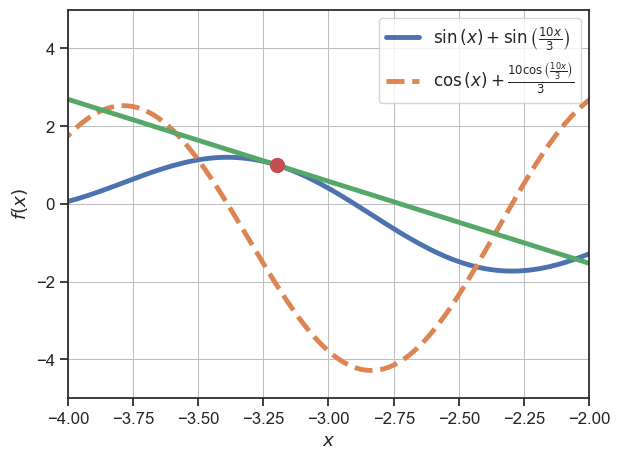

In [7]:
fig, ax = plt.subplots()

x = Symbol('x')
funky_function = sin(x) + sin(Rational(10.0, 3.0) * x)
funky_function_lambda = lambdify(x, funky_function)

funky_function_derivative_lambda = lambdify(x, funky_function.diff(x))
sols = fsolve(funky_function_derivative_lambda, np.linspace(-4,4,15))
point = sols[0]+1

plt.scatter(point, funky_function_lambda(point), marker='o', color='r', s=100, zorder=100)

p1 = plot(funky_function, show=False, legend=True, xlim=(-4,-2), ylim=(-5,5), fig=fig, ax=ax)
p2 = plot(funky_function.diff(x), {'linestyle':'--'}, show=False, xlim=(-4,-2), fig=fig, ax=ax)
p1.append(p2[0])

p3 = plot(funky_function_derivative_lambda(point)*(x-point) + funky_function_lambda(point), {'label':''}, show=False, fig=fig, ax=ax)
p1.append(p3[0])

p1.show()

### Gradient descent implementation

Let's implement gradient descent and apply it to this function! The Python function takes as input the function to be minimized, the function representing its derivative, an initial point, and optional step-size and iteration limit parameters.

We print out what happens in every iteration. You can see that depending on `initial_point`, you may end up at a different local minimum. Increasing the step-size by a lot is risky; try it out!

The plot after the algorithm terminates shows both the initial point and final solution in green and red, respectively.

In [8]:
def gradient_descent(f, fprime, initial_point, stepsize=0.1, iteration_limit=100):
    # the number of variables
    dimension = len(initial_point)
    all_zeros = np.zeros(dimension)

    # initial point, value, and gradient
    current_iterate = np.copy(initial_point)
    current_value = f(current_iterate)
    grad = fprime(current_iterate)
    iter_counter = 0
    print("iteration, x, f(x), f'(x)")
    print(iter_counter, current_iterate, current_value, grad)

    # the algorithm terminates if iteration_limit is hit or the gradient at the current iterate is close to zero
    while not np.isclose(grad, all_zeros) and iter_counter < iteration_limit:
        # gradient descent step
        current_iterate -= stepsize * fprime(current_iterate)
        current_value = f(current_iterate)
        grad = fprime(current_iterate)
        iter_counter += 1
        print(iter_counter, current_iterate, current_value, grad)
    print(initial_point)
    return current_iterate

iteration, x, f(x), f'(x)
0 [2.] [1.28344866] [2.67507884]
1 [1.73249212] [0.50034005] [2.75106181]
2 [1.45738594] [0.0041517] [0.59666951]
3 [1.39771898] [-0.01351905] [-0.00545358]
4 [1.39826434] [-0.01352052] [6.03944163e-05]
5 [1.3982583] [-0.01352052] [-6.71686638e-07]
6 [1.39825837] [-0.01352052] [7.46992626e-09]
[2.]


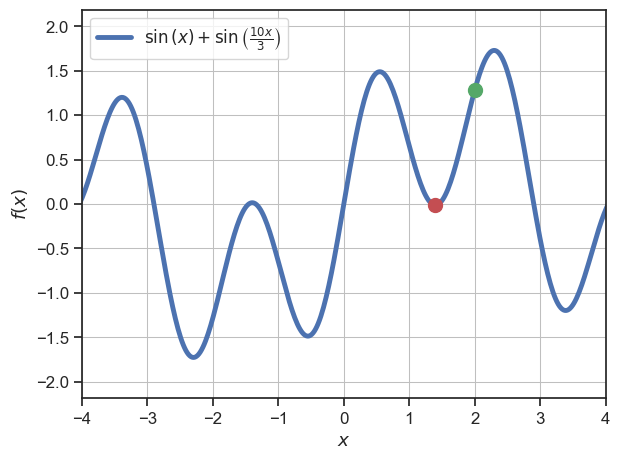

In [9]:
initial_point = np.array([2.0])
local_min = gradient_descent(funky_function_lambda, funky_function_derivative_lambda, initial_point, stepsize=0.1)

fig, ax = plt.subplots()

point = local_min

plt.scatter(point, funky_function_lambda(point), marker='o', color='r', s=100, zorder=100)
plt.scatter(initial_point, funky_function_lambda(initial_point), marker='o', color='g', s=100, zorder=100)

p1 = plot(funky_function, show=False, legend=True, xlim=(-4,4), fig=fig, ax=ax)
p1.show()

### Gradient descent on a convex function

Let's apply the same procedure to the function $f(x)=x\log{x}$. Here the behavior of gradient descent (GD) is much nicer. No matter the initial point, the same unique global optimum will be recovered; this is a property of *convex functions*, which we will discuss shortly. There are no other local minima to worry about. Note that a global minimum is also, by definition, a local minimum.

iteration, x, f(x), f'(x)
0 [3.] [3.29583687] [2.09861229]
1 [2.79013877] [2.86293721] [2.02609133]
2 [2.58752964] [2.45997377] [1.95070361]
3 [2.39245928] [2.08699444] [1.87232182]
4 [2.20522709] [1.74396083] [1.79083049]
5 [2.02614404] [1.43073021] [1.7061345]
6 [1.85553059] [1.14703463] [1.61817069]
7 [1.69371353] [0.89245741] [1.52692347]
8 [1.54102118] [0.66640737] [1.4324453]
9 [1.39777665] [0.46809145] [1.33488287]
10 [1.26428836] [0.29648751] [1.2345094]
11 [1.14083742] [0.15031967] [1.13176257]
12 [1.02766116] [0.02804025] [1.02728551]
13 [0.92493261] [-0.07217656] [0.92196561]
14 [0.83273605] [-0.1524228] [0.81696145]
15 [0.75103991] [-0.21502009] [0.71370351]
16 [0.67966956] [-0.26245341] [0.61385146]
17 [0.61828441] [-0.2972753] [0.51919329]
18 [0.56636508] [-0.32198783] [0.43148361]
19 [0.52321672] [-0.33891861] [0.35224048]
20 [0.48799267] [-0.35011273] [0.28254511]
21 [0.45973816] [-0.35726168] [0.22290184]
22 [0.43744798] [-0.36168089] [0.17320251]
23 [0.42012773] [-0.3

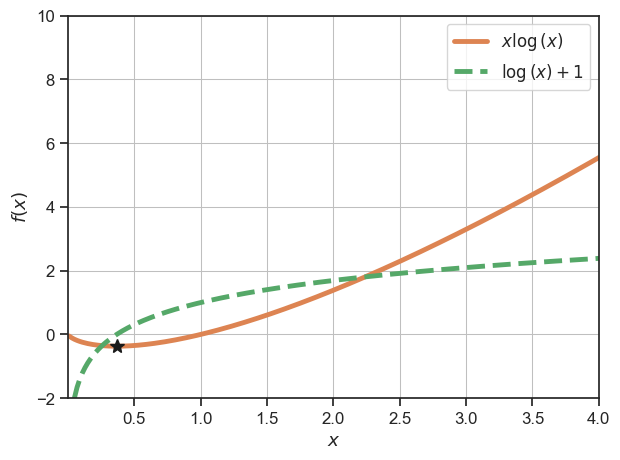

In [10]:
fig, ax = plt.subplots()

x = Symbol('x')
convex_function1 = x*log(x)
convex_function1_lambda = lambdify(x, convex_function1)

convex_function1_derivative_lambda = lambdify(x, convex_function1.diff(x))

p1 = plot(convex_function1, show=False, legend=True, xlim=(1e-6,4), ylim=(-2,10), fig=fig, ax=ax)
p2 = plot(convex_function1.diff(x), {'linestyle':'--'}, show=False, xlim=(1e-6,4), fig=fig, ax=ax)

global_min = gradient_descent(convex_function1_lambda, convex_function1_derivative_lambda, np.array([3.0]), stepsize=0.1)
plt.plot(global_min, convex_function1_lambda(global_min), 'k*', markersize=10, zorder=100) 

p1.append(p2[0])
p1.show()


## Necessary and sufficient conditions for local optimality in unconstrained optimization

We have already presented one definition of a local minimizer in {ref}`local-min`. This definition is not very useful in computation since it requires comparing a candidate point $x^\star$ to potentially infinitely many neighboring points. 
We've also seen that a point with derivative zero may or may not be a local optimum. 

It turns out that for functions that are *twice-differentiable*, i.e., for which the function $f''(\cdot)$ exists for all points in the domain of $f$, the polarity (or sign) of the second derivative of a univariate function is crucial to determining whether a point is a local optimum or not. The second derivative is defined as
\begin{equation*}
f''(x)=\frac{\partial}{\partial x}\left(\frac{\partial f(x)}{\partial x}\right).
\end{equation*}

Let's look at an illustrating example.

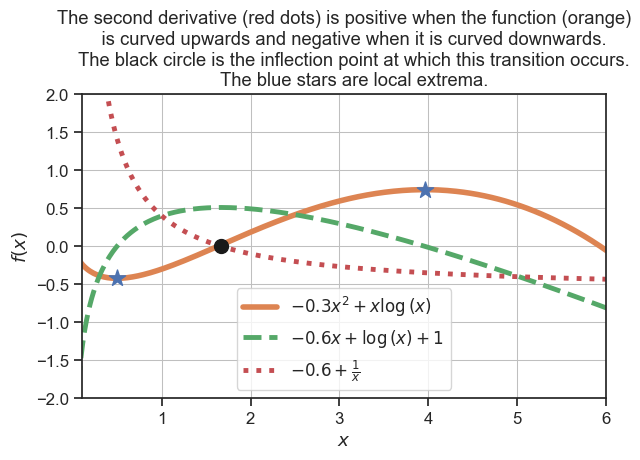

In [69]:
fig, ax = plt.subplots()
ax.set_title(
    "The second derivative (red dots) is positive when the function (orange)\n\
    is curved upwards and negative when it is curved downwards.\n\
    The black circle is the inflection point at which this transition occurs.\n\
    The blue stars are local extrema.")

x = Symbol('x')
nonconvex_function1 = x*log(x) - 0.3*x**2
nonconvex_function1_lambda = lambdify(x, nonconvex_function1)

nonconvex_function1_derivative_lambda = lambdify(x, nonconvex_function1.diff(x))
nonconvex_function1_derivative2_lambda = lambdify(x, nonconvex_function1.diff(x, 2))

p1 = plot(nonconvex_function1, {'linewidth':4}, show=False, legend=True, xlim=(.1,6), ylim=(-2,2), fig=fig, ax=ax)
p2 = plot(nonconvex_function1.diff(x), {'linestyle':'--'}, show=False, xlim=(.1,4), fig=fig, ax=ax)
p3 = plot(nonconvex_function1.diff(x, 2), {'linestyle':'dotted'}, show=False, xlim=(.1,4), fig=fig, ax=ax)

inflection_point = solve(nonconvex_function1.diff(x, 2), x)
plt.plot(inflection_point, 0, 'ko', markersize=10, zorder=100) 

sols = fsolve(nonconvex_function1_derivative_lambda, np.linspace(1e-6,6,2))
plt.scatter(sols, [nonconvex_function1_lambda(sol) for sol in sols], marker='*', s=150, color='b', zorder=100)

p1.append(p2[0])
p1.append(p3[0])
p1.show()

Before we state the two sets of conditions for local optimality, we need one more definition:
```{prf:definition} Strong local minimizer
:label: strong-local-min
A *strong local minimizer* is a point that *uniquely* minimizes a function $f$ within a neighborhood. In other words, $\hat{\boldsymbol{x}}$ is a strong local minimizer if there exists a $\delta > 0$ such that $f(\hat{\boldsymbol{x}}) <  f(x)$ whenever $\hat{\boldsymbol{x}}\neq \boldsymbol{x}$ and $\lVert \boldsymbol{x}-\hat{\boldsymbol{x}}\rVert<\delta$.
```
A local minimum that is *not* a strong local minimizer is referred to as a **weak** local minimizer.

```{prf:theorem} Sufficient conditions for a local minimum for univariate functions
:label: univariate-sufficient-localopt
A point $\boldsymbol{x}^\star$ is a **strong** local minimizer of a twice-differentiable function $f$ if it satisfies the following:
1. $f'(\boldsymbol{x}^\star) = 0$;
2. $f''(\boldsymbol{x}^\star) > 0$.
```

```{prf:theorem} Necessary conditions for a local minimum for univariate functions
:label: univariate-necessary-localopt
A local minimizer of a twice-differentiable function $f$ satisfies the following:
1. $f'(\boldsymbol{x}^\star) = 0$, the *first-order necessary condition* (FONC);
2. $f''(\boldsymbol{x}^\star) \geq 0$, the *second-order necessary condition* (SONC).
```

Notice that the difference between the two sets of conditions is in the second one. Every point with zero derivative and **strictly positive** second derivative is guaranteed to be a strong local minimum. Every local minimum (weak or strong) has second derivative at least zero. Not every point with second derivative at least zero is a local minimum.

### What is a weak local minimum?
We have just distinguished two types of local minimum, weak and strong. In many of illustrations above, the local minima we saw happened to be strong. If you look around them, you'll see they uniquely minimize the function in that neighborhood, i.e., the neighborhood is *not* flat. Let's see what weak minima look like!

Consider the following function:

\begin{equation*}
f(x)=\begin{cases} 
        \left(x + 1\right)^{2} & \text{for}\: x \leq -1 \\
        0 & \text{for}\: -1 < x < 1 \\
        \left(x - 1\right)^{2} & \text{for}\: x \geq 1 
      \end{cases}
\end{equation*}

Clearly, all points in $[-1,1]$ are minimizers of this function with function value zero. However, none of them is a strong minimizer: the neighborhood around any point in the flat region of this function contains at least one other point with the same function value. These points are then weak minimizers. 


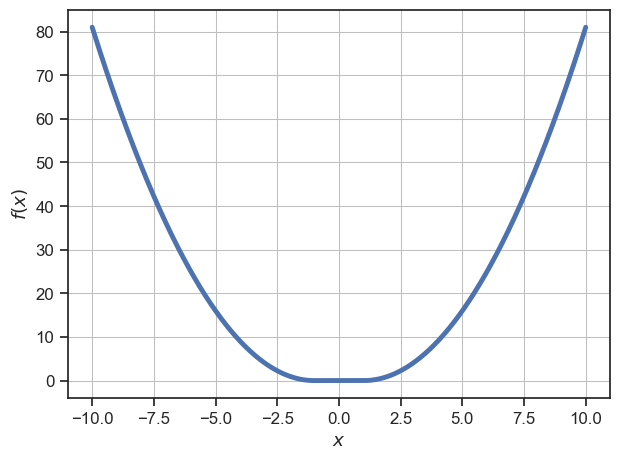

In [12]:
fig, ax = plt.subplots()
x = Symbol('x')
piecewise_fun = Piecewise(((x+1)**2, x <= -1), (0, x < 1), ((x-1)**2, x >= 1))
p1 = plot(piecewise_fun, show=False, legend=False, fig=fig, ax=ax)
p1.show()

### Generalization to multivariate functions
When function $f$ has two or more inputs, the local optimality conditions above are generalized to use the *gradient* instead of the derivative ({ref}`multivariate-necessary-localopt`):

\begin{equation}
\LARGE
\label{eq:gradient}
\nabla_{\boldsymbol{x}}f({\boldsymbol{\hat x}}) =
\begin{bmatrix}
    \frac{\partial f(\hat{\boldsymbol{x}})}{\partial{x_1}}, & \frac{\partial f(\hat{\boldsymbol{x}})}{\partial{x_2}}, & \cdots &, \frac{\partial f(\hat{\boldsymbol{x}})}{\partial{x_n}}
\end{bmatrix}
\end{equation}

Similarly, the second derivative is generalized to higher dimensions and is referred to as the *Hessian* matrix, 
\begin{equation}
\LARGE
\label{eq:hessian}
\nabla_{\boldsymbol{x}}^2 f({\boldsymbol{\hat x}}) =
\begin{bmatrix}
    \frac{\partial^2 f(\hat{\boldsymbol{x}})}{\partial{x_1x_1}} & \frac{\partial^2 f(\hat{\boldsymbol{x}})}{\partial{x_1x_2}} & \cdots & \frac{\partial^2 f(\hat{\boldsymbol{x}})}{\partial{x_1x_n}}\\[1ex]
    \vdots & \ddots & & \vdots\\[1ex]
    \vdots &  & \ddots & \vdots\\[1ex]
    \frac{\partial^2 f(\hat{\boldsymbol{x}})}{\partial{x_nx_1}} & \frac{\partial^2 f(\hat{\boldsymbol{x}})}{\partial{x_nx_2}} & \cdots & \frac{\partial^2 f(\hat{\boldsymbol{x}})}{\partial{x_nx_n}}
\end{bmatrix}
\end{equation}
The $(i,j)$-th entry of this matrix contains the value of the second derivative of $f$ with respect to the two variables $x_i$ and $x_j$. The Hessian is symmetric, i.e., $\left(\nabla_{\boldsymbol{x}}^2 f(\hat{\boldsymbol{x}})\right)_{i,j} = \left(\nabla_{\boldsymbol{x}}^2 f(\hat{\boldsymbol{x}})\right)_{j,i}$.



```{prf:theorem} Necessary conditions for a local minimum for multivariate functions
:label: multivariate-necessary-localopt
A local minimizer of a multivariate twice-differentiable function $f$ satisfies the following:
1. $\nabla_{\boldsymbol{x}}f(\boldsymbol{x}^\star) = \boldsymbol{0}$, the *first-order necessary condition* (FONC);
2. The Hessian matrix $\nabla_{\boldsymbol{x}}^2 f(\boldsymbol{x}^\star)$ is positive semi-definite, the *second-order necessary condition* (SONC),

where $\boldsymbol{0}$ is the $n$-dimensional vector of all zeros.
```
We will not go into the mathematical definition of *positive semi-definiteness* here, but think of it as the multidimensional generalization of a univariate function being flat or curved upwards.

```{admonition} If you're curious...
about how the Hessian can be used to improve unconstrained optimization, think about the saddle point we saw earlier. Let's say you are using gradient descent to minimize a function that has saddle points. The descent reaches a point with zero gradient; is it a local minimum? We can compute the Hessian at that point (potentially computationally expensive in high dimensions!) and check if it is positive definite (strong local minimizer), negative definite (strong local maximizer), or has both positive and negative eigenvalues (saddle point). In the latter case, one can take a small random step from the current point to "escape" the saddle. This is discussed at length in this [Off the convex path blog post](https://www.offconvex.org/2016/03/22/saddlepoints/).
```